In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure this line is included
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import plotly.express as px

cols = pd.read_csv("var_names.csv")
data = pd.read_csv("CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

df = pd.read_csv("CSCS_data_anon.csv")

<ipython-input-2-e6723e90f774>:16: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSCS_data_anon.csv",
<ipython-input-2-e6723e90f774>:23: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSCS_data_anon.csv")


# Question 1

In [ ]:
print(data['DEMO_age'].count())
print(data['CONNECTION_social_time_friends_p7d'].count())
print(data['LONELY_chronic_lonely_others'].count()) #var 930 and 2022 cross

10220
5982
551


In [ ]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = data[data['DATASET'] == '2022 Cross-Sectional']

Age_2022_Data = data[data['DATASET'] == '2022 Cross-Sectional']
Age_2022_Data = Age_2022_Data['DEMO_age']

# Get the value counts for DEMO_age in this filtered dataset
age_counts = filtered_data['DEMO_age'].count()

print(age_counts)

3770


In [ ]:
Age_2022_Data = Age_2022_Data.dropna()
Age_2022_Data

,DEMO_age
0,71.0
1,69.0
2,56.0
5,55.0
7,52.0
...,...
11421,62.0
11422,50.0
11423,64.0
11424,68.0


In [ ]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = data[data['DATASET'] == '2022 Cross-Sectional']

Social_Time_2022_Data = data[data['DATASET'] == '2022 Cross-Sectional']
Social_Time_2022_Data = Social_Time_2022_Data['CONNECTION_social_time_friends_p7d']

# Get the value counts for DEMO_age in this filtered dataset
time_counts = filtered_data['CONNECTION_social_time_friends_p7d'].count()

print(time_counts)

2817


In [ ]:
Social_Time_2022_Data = Social_Time_2022_Data.dropna()
Social_Time_2022_Data

,CONNECTION_social_time_friends_p7d
0,6.0
1,4.0
2,9.0
5,3.0
7,0.0
...,...
11420,3.0
11421,0.0
11422,1.0
11423,4.0


In [ ]:
# Filter for the 2022 Cross-Sectional dataset
filtered_data = data[data['DATASET'] == '2022 Cross-Sectional']

Lonely_2022_Data = data[data['DATASET'] == '2022 Cross-Sectional']
Lonely_2022_Data = Lonely_2022_Data['LONELY_dejong_emotional_social_loneliness_scale_emptiness']

# Get the value counts for DEMO_age in this filtered dataset
lonely_counts = filtered_data['LONELY_dejong_emotional_social_loneliness_scale_emptiness'].count()

#print(lonely_counts)

print(Lonely_2022_Data.value_counts())

LONELY_dejong_emotional_social_loneliness_scale_emptiness
No              1057
More or less     879
Yes              754
Name: count, dtype: int64


In [ ]:
Lonely_2022_Data = Lonely_2022_Data.replace({'More or less': 'Yes_or_More_or_Less', 'Yes': 'Yes_or_More_or_Less'})

In [ ]:
Lonely_2022_Data.value_counts()

,count
LONELY_dejong_emotional_social_loneliness_scale_emptiness,
Yes_or_More_or_Less,1633
No,1057


In [ ]:
data_filtered = {
    'Age_2022_Data': Age_2022_Data,
    'Social_Time_2022_Data': Social_Time_2022_Data,
    'Lonely_2022_Data': Lonely_2022_Data
}

compiled_data = pd.DataFrame(data_filtered)

In [ ]:
compiled_data = compiled_data.dropna()

In [ ]:
compiled_data.value_counts()

Age_2022_Data  Social_Time_2022_Data  Lonely_2022_Data   
28.0           10.0                   Yes_or_More_or_Less    62
61.0           0.0                    Yes_or_More_or_Less    17
57.0           0.0                    Yes_or_More_or_Less    15
58.0           0.0                    Yes_or_More_or_Less    14
62.0           0.0                    Yes_or_More_or_Less    13
                                                             ..
39.0           10.0                   Yes_or_More_or_Less     1
               17.0                   Yes_or_More_or_Less     1
               20.0                   No                      1
                                      Yes_or_More_or_Less     1
96.0           15.0                   No                      1
Name: count, Length: 1256, dtype: int64

In [ ]:
# Remove rows where Social_Time_2022_Data >= 50
compiled_data = compiled_data[compiled_data['Social_Time_2022_Data'] < 50]
compiled_data

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data
0,71.0,6.0,Yes_or_More_or_Less
1,69.0,4.0,No
2,56.0,9.0,No
5,55.0,3.0,No
7,52.0,0.0,Yes_or_More_or_Less
...,...,...,...
11420,32.0,3.0,Yes_or_More_or_Less
11421,62.0,0.0,No
11422,50.0,1.0,No
11423,64.0,4.0,Yes_or_More_or_Less


In [ ]:
# Remove rows where Age_2022_Data >= 85
compiled_data = compiled_data[compiled_data['Age_2022_Data'] < 85]
compiled_data

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data
0,71.0,6.0,Yes_or_More_or_Less
1,69.0,4.0,No
2,56.0,9.0,No
5,55.0,3.0,No
7,52.0,0.0,Yes_or_More_or_Less
...,...,...,...
11420,32.0,3.0,Yes_or_More_or_Less
11421,62.0,0.0,No
11422,50.0,1.0,No
11423,64.0,4.0,Yes_or_More_or_Less


## Part 1: Breakdown of Each Variable

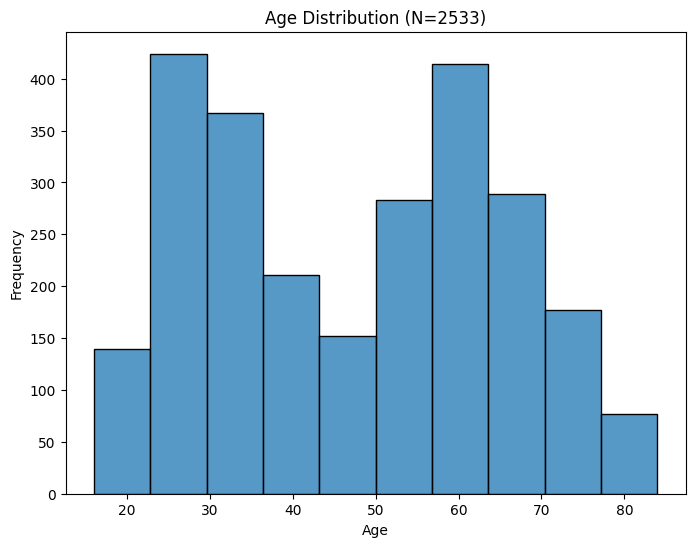

In [ ]:
# 1. Histogram for Age_2022_Data
plt.figure(figsize=(8, 6))
sns.histplot(compiled_data['Age_2022_Data'], bins=10, kde=False)
plt.title(f'Age Distribution (N={len(compiled_data["Age_2022_Data"])})')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

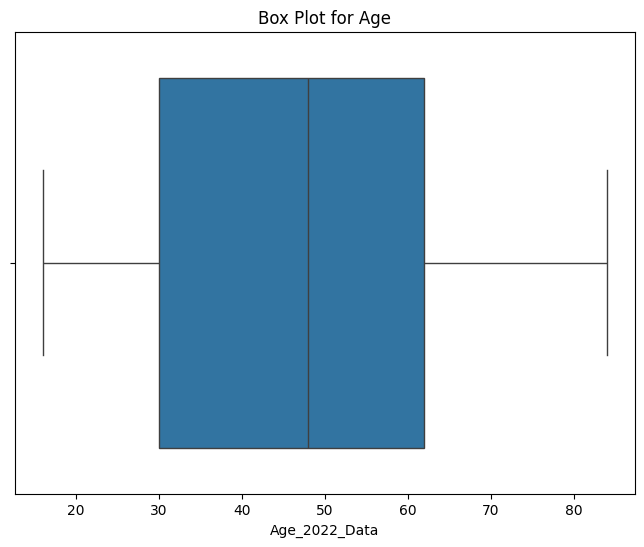

In [ ]:
# 2. Box Plot for Age_2022_Data with Statistics
plt.figure(figsize=(8, 6))
sns.boxplot(data=compiled_data, x='Age_2022_Data')
plt.title('Box Plot for Age')

plt.show()

In [ ]:
age_summary = {
    'Statistic': ['Mean', 'Median', 'Q1', 'Q3'],
    'Age_2022_Data': [
        compiled_data['Age_2022_Data'].mean(),
        compiled_data['Age_2022_Data'].median(),
        compiled_data['Age_2022_Data'].quantile(0.25),
        compiled_data['Age_2022_Data'].quantile(0.75)
    ]
}

print(age_summary)

{'Statistic': ['Mean', 'Median', 'Q1', 'Q3'], 'Age_2022_Data': [47.363205684958544, 48.0, 30.0, 62.0]}


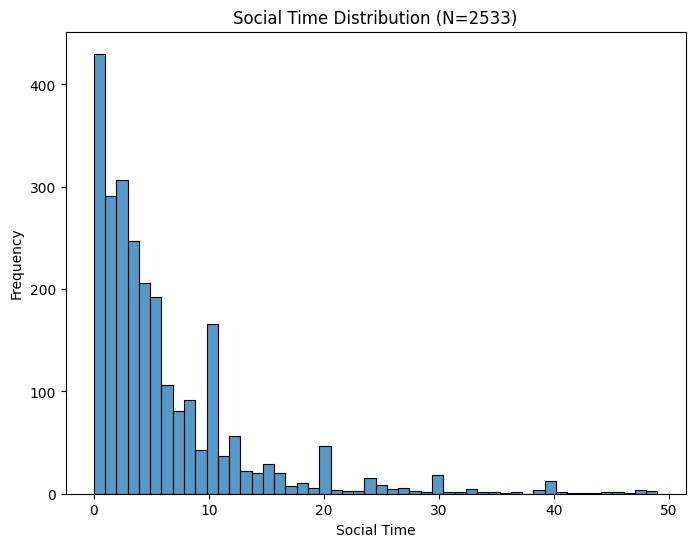

In [ ]:
# 3. Histogram for Social_Time_2022_Data
plt.figure(figsize=(8, 6))
sns.histplot(compiled_data['Social_Time_2022_Data'], bins=50, kde=False)
plt.title(f'Social Time Distribution (N={len(compiled_data["Social_Time_2022_Data"])})')
plt.xlabel('Social Time')
plt.ylabel('Frequency')
plt.show()

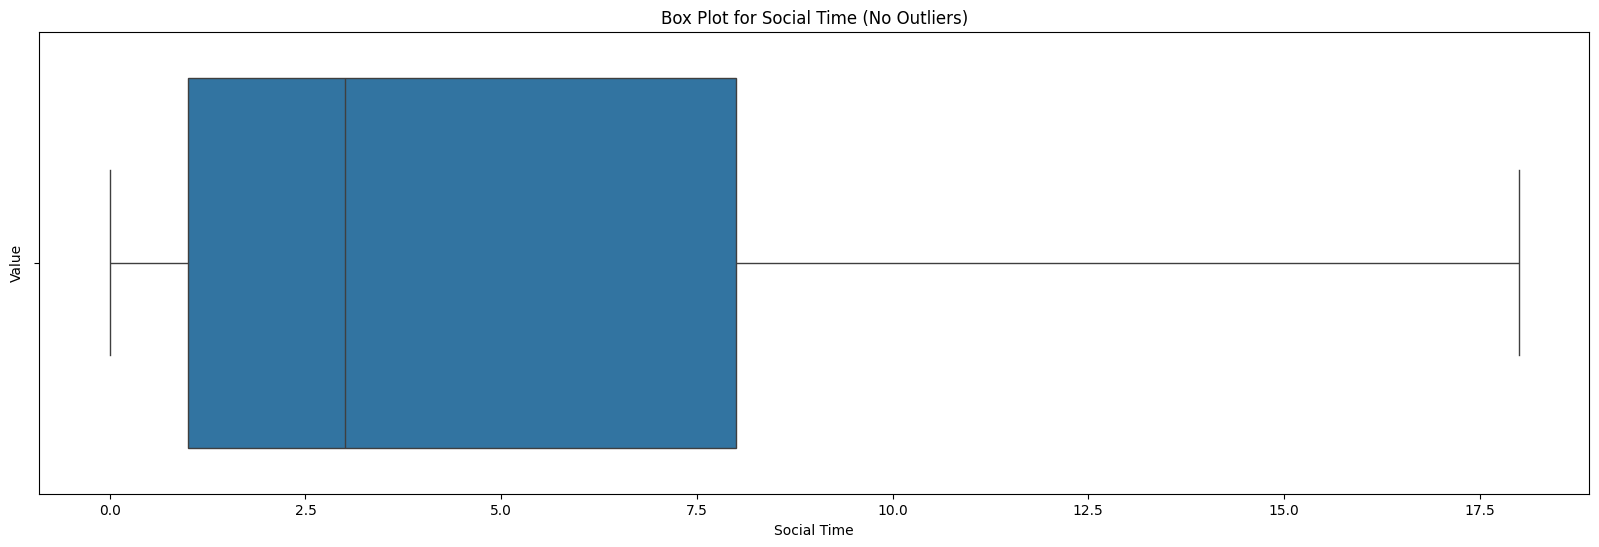

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Box Plot for 'Social_Time_2022_Data', without outliers
plt.figure(figsize=(20, 6))
sns.boxplot(data=compiled_data, x='Social_Time_2022_Data',showfliers=False) #remember to use true too

# Add titles and labels
plt.title('Box Plot for Social Time (No Outliers)')
plt.xlabel('Social Time')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
social_time_summary = {
    'Statistic': ['Mean', 'Median', 'Q1', 'Q3'],
    'Social_Time_2022_Data': [
        compiled_data['Social_Time_2022_Data'].mean(),
        compiled_data['Social_Time_2022_Data'].median(),
        compiled_data['Social_Time_2022_Data'].quantile(0.25),
        compiled_data['Social_Time_2022_Data'].quantile(0.75)
    ]
}

print(social_time_summary)

{'Statistic': ['Mean', 'Median', 'Q1', 'Q3'], 'Social_Time_2022_Data': [5.889459139360442, 3.0, 1.0, 8.0]}


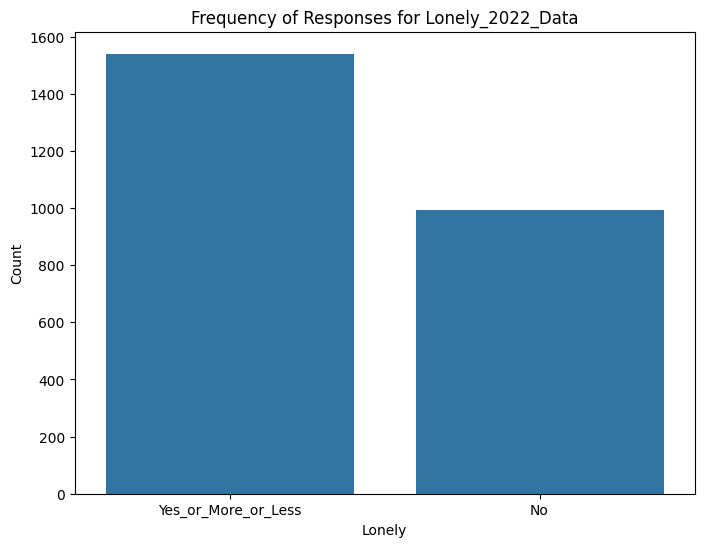

In [ ]:
# 7. Bar Plot for Lonely 2022 Data
plt.figure(figsize=(8, 6))
sns.countplot(x='Lonely_2022_Data', data=compiled_data)

# Customize the plot
plt.title('Frequency of Responses for Lonely_2022_Data')
plt.xlabel('Lonely')
plt.ylabel('Count')
plt.show()

In [ ]:
#Proportion:

# Count how many "Yes" values exist in the 'Lonely_2022_Data' column
count_yes = (compiled_data['Lonely_2022_Data'] == 'Yes_or_More_or_Less').sum()

print(count_yes)

print('Percentage who are lonely: ', round(count_yes/compiled_data['Lonely_2022_Data'].count() * 100), '%')

1540
Percentage who are lonely:  61 %


## Part 2:

Linear Regression Model on Age v Social Time

In [ ]:
# First model: Age v Social Time
age_social_time = 'Social_Time_2022_Data ~ Age_2022_Data' # Formula
age_social_model = smf.ols(formula = age_social_time, data = compiled_data) # Model
fitted_age_social_model = age_social_model.fit() # Model fit

In [ ]:
import plotly.express as px

print('AGE V. SOCIAL TIME')
print('R-squared:', fitted_age_social_model.rsquared)
print()
print(fitted_age_social_model.summary().tables[1])

# Scatter plot of the data with regression line
fig = px.scatter(compiled_data,
                 x="Age_2022_Data",
                 y="Social_Time_2022_Data",
                 title="Social Time vs Age (2022 Data)",
                 labels={"Age_2022_Data": "Age", "Social_Time_2022_Data": "Social Time"},
                 opacity=0.6)

# Add regression line (fitted values)
fig.add_scatter(x=compiled_data["Age_2022_Data"],
                y=fitted_age_social_model.fittedvalues,
                mode='lines',
                name='Fitted Line',
                line=dict(color='red'))

# Customize layout for clarity
fig.update_layout(
    xaxis_title="Age (2022)",
    yaxis_title="Social Time (2022)",
    legend_title="Legend",
    template="plotly_white"
)

# Show the plot
fig.show()

AGE V. SOCIAL TIME
R-squared: 0.07687963883624271

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.4982      0.412     27.908      0.000      10.690      12.306
Age_2022_Data    -0.1184      0.008    -14.519      0.000      -0.134      -0.102


Age v.s Proportion of Loneliness

R-squared: 0.6017061748742794

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8763      0.032     27.291      0.000       0.812       0.940
Age_2022_Data    -0.0060      0.001    -10.061      0.000      -0.007      -0.005


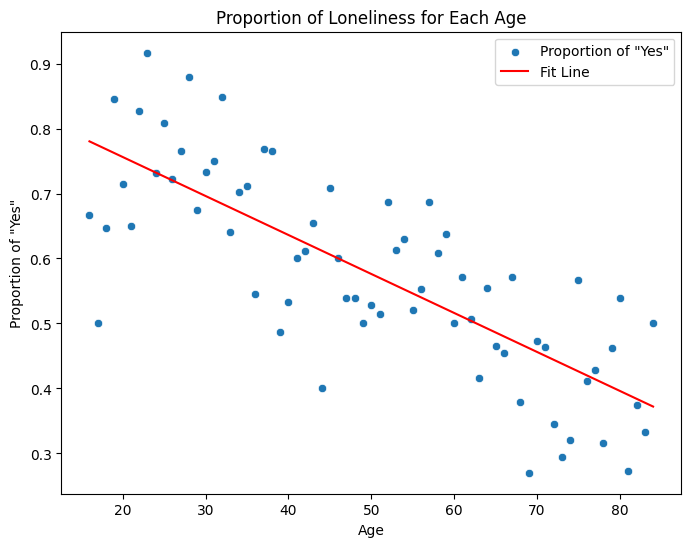

In [ ]:
# Calculate the proportion of "yes" for each age
age_proportions = compiled_data.groupby('Age_2022_Data')['Lonely_2022_Data'].apply(lambda x: (x == 'Yes_or_More_or_Less').mean()).reset_index()

# Define the formula and model
age_social_time = 'Lonely_2022_Data ~ Age_2022_Data'
model_spec = smf.ols(formula=age_social_time, data=age_proportions)
fitted_model = model_spec.fit()

# Get the predictions from the model
predictions = fitted_model.predict(age_proportions)

# Plot the proportions and the fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_2022_Data', y='Lonely_2022_Data', data=age_proportions, label='Proportion of "Yes"')
plt.plot(age_proportions['Age_2022_Data'], predictions, color='red', label='Fit Line')

print('R-squared:', fitted_model.rsquared)
print()
print(fitted_model.summary().tables[1])

# Titles and labels
plt.title('Proportion of Loneliness for Each Age')
plt.xlabel('Age')
plt.ylabel('Proportion of "Yes"')
plt.legend()
plt.show()

Social Time v.s Proportion of Loneliness

R-squared: 0.0028812208865169886

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6435      0.071      9.065      0.000       0.501       0.786
Social_Time_2022_Data    -0.0009      0.003     -0.369      0.714      -0.006       0.004


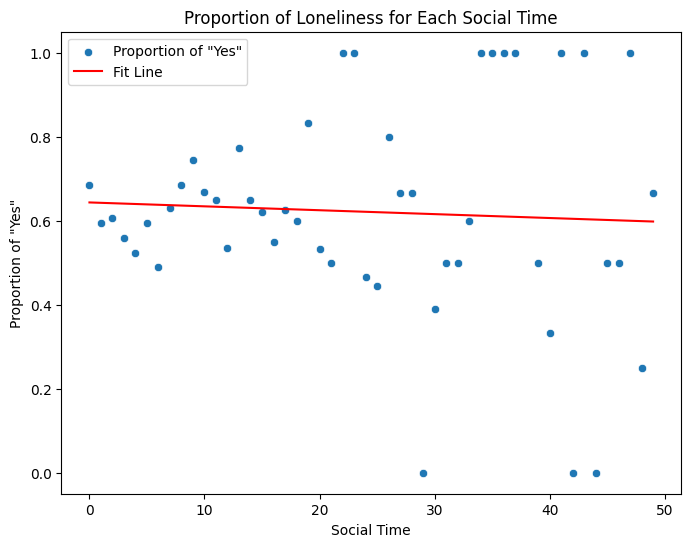

In [ ]:
# Calculate the proportion of "yes" for each social time spent
social_time_proportions = compiled_data.groupby('Social_Time_2022_Data')['Lonely_2022_Data'].apply(lambda x: (x == 'Yes_or_More_or_Less').mean()).reset_index()

# Define the formula and model (using Social Time instead of Age)
social_time_formula = 'Lonely_2022_Data ~ Social_Time_2022_Data'
model_spec = smf.ols(formula=social_time_formula, data=social_time_proportions)
fitted_model = model_spec.fit()

# Get the predictions from the model
predictions = fitted_model.predict(social_time_proportions)

# Plot the proportions and the fitted line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Social_Time_2022_Data', y='Lonely_2022_Data', data=social_time_proportions, label='Proportion of "Yes"')
plt.plot(social_time_proportions['Social_Time_2022_Data'], predictions, color='red', label='Fit Line')

print('R-squared:', fitted_model.rsquared)
print()
print(fitted_model.summary().tables[1])

# Titles and labels
plt.title('Proportion of Loneliness for Each Social Time')
plt.xlabel('Social Time')
plt.ylabel('Proportion of "Yes"')
plt.legend()
plt.show()


## Part 3: Statistical Analysis

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
compiled_data['Lonely_2022_Binary'] = compiled_data['Lonely_2022_Data'].apply(lambda x: 0 if x == 'No' else 1)

<ipython-input-29-74fccb830092>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
compiled_data.value_counts()

Age_2022_Data  Social_Time_2022_Data  Lonely_2022_Data     Lonely_2022_Binary
28.0           10.0                   Yes_or_More_or_Less  1                     62
61.0           0.0                    Yes_or_More_or_Less  1                     17
57.0           0.0                    Yes_or_More_or_Less  1                     15
58.0           0.0                    Yes_or_More_or_Less  1                     14
64.0           0.0                    Yes_or_More_or_Less  1                     13
                                                                                 ..
40.0           2.0                    No                   0                      1
               3.0                    No                   0                      1
               4.0                    No                   0                      1
                                      Yes_or_More_or_Less  1                      1
84.0           6.0                    No                   0                      1
Name: count, Length: 1197, dtype: int64

**Without Interaction**

In [ ]:
model1_spec = smf.logit(formula='Lonely_2022_Binary ~ Social_Time_2022_Data + Age_2022_Data', data=compiled_data)

In [ ]:
model1_fit = model1_spec.fit()

Optimization terminated successfully.
         Current function value: 0.632614
         Iterations 5


In [ ]:
model1_fit.predict(compiled_data)

,0
0,0.416530
1,0.448824
2,0.519949
5,0.575427
7,0.622798
...,...
11420,0.748184
11421,0.539958
11422,0.631351
11423,0.491303


In [ ]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2533
Model:                          Logit   Df Residuals:                     2530
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.05530
Time:                        21:12:28   Log-Likelihood:                -1602.4
converged:                       True   LL-Null:                       -1696.2
Covariance Type:            nonrobust   LLR p-value:                 1.833e-41
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2760      0.150     15.224      0.000       1.983       2.569
Social_Time_2022_Data    -0.0317      0.006     -5.436      0.000      -0.043      -0.020
Age_2022_Data            -0.0341      0.003    -13.085      0.000      -0.039      -0.029
=========================================================================================
"""

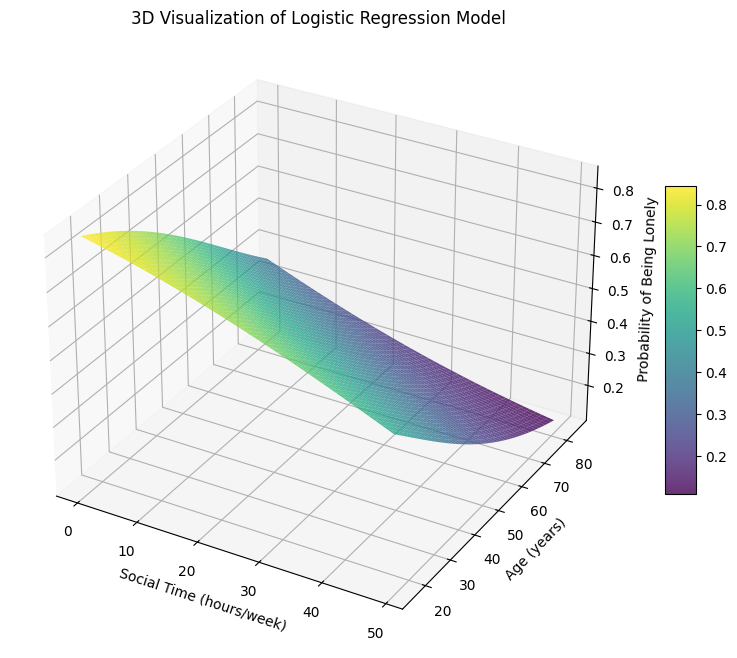

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model1_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

**With interaction**

In [ ]:
model2_spec = smf.logit(formula='Lonely_2022_Binary ~ Social_Time_2022_Data + Age_2022_Data + Social_Time_2022_Data * Age_2022_Data', data=compiled_data)

In [ ]:
model2_fit = model2_spec.fit()

Optimization terminated successfully.
         Current function value: 0.630777
         Iterations 5


In [ ]:
model2_fit.predict(compiled_data)

,0
0,0.397129
1,0.447492
2,0.489217
5,0.574487
7,0.630919
...,...
11420,0.736528
11421,0.563826
11422,0.633556
11423,0.488396


In [ ]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2533
Model:                          Logit   Df Residuals:                     2529
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.05804
Time:                        21:12:29   Log-Likelihood:                -1597.8
converged:                       True   LL-Null:                       -1696.2
Covariance Type:            nonrobust   LLR p-value:                 1.968e-42
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.9893      0.176     11.295      0.000       1.644       2.335
Social_Time_2022_Data                   0.0171      0.017      0.978      0.328      -0.017       0.051
Age_2022_Data                          -0.0279      0.003     -8.466      0.000      -0.034      -0.021
Social_Time_2022_Data:Age_2022_Data    -0.0012      0.000     -2.948      0.003      -0.002      -0.000
=======================================================================================================
"""

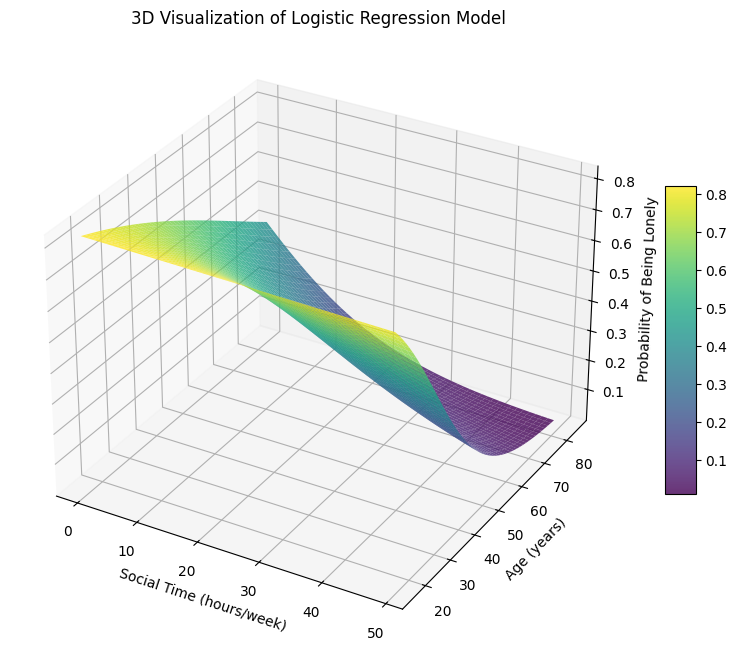

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model2_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

With scale:

In [ ]:
model3_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data)

In [ ]:
model3_fit = model3_spec.fit()

Optimization terminated successfully.
         Current function value: 0.630777
         Iterations 5


In [ ]:
model3_fit.predict(compiled_data)

,0
0,0.397129
1,0.447492
2,0.489217
5,0.574487
7,0.630919
...,...
11420,0.736528
11421,0.563826
11422,0.633556
11423,0.488396


In [ ]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                 2533
Model:                          Logit   Df Residuals:                     2529
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.05804
Time:                        21:12:31   Log-Likelihood:                -1597.8
converged:                       True   LL-Null:                       -1696.2
Covariance Type:            nonrobust   LLR p-value:                 1.968e-42
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.4675      0.043     10.967      0.000       0.384       0.551
scale(Social_Time_2022_Data)                     0.1282      0.131      0.978      0.328      -0.129       0.385
scale(Age_2022_Data)                            -0.4907      0.058     -8.466      0.000      -0.604      -0.377
scale(Social_Time_2022_Data * Age_2022_Data)    -0.3845      0.130     -2.948      0.003      -0.640      -0.129
================================================================================================================
"""

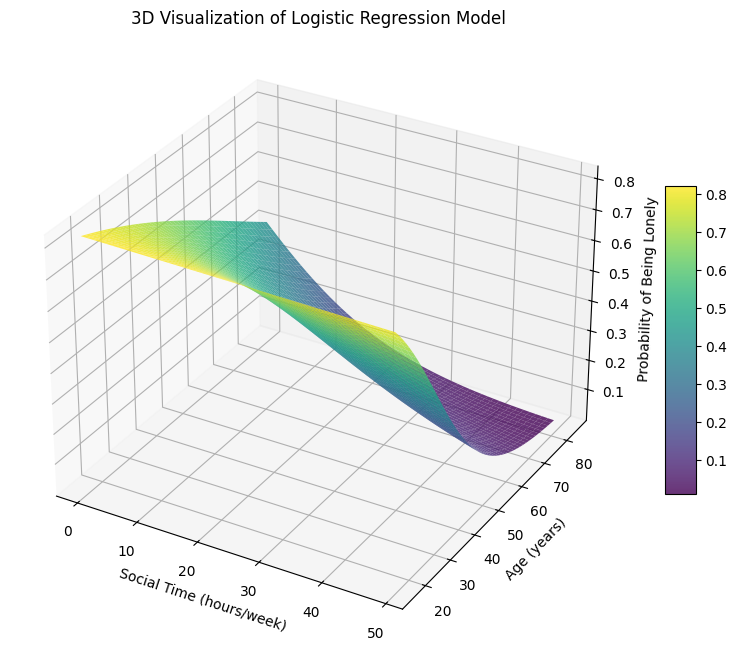

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data['Social_Time_2022_Data'].min(),
                                compiled_data['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data['Age_2022_Data'].min(),
                        compiled_data['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model3_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Model focused on seniors

In [ ]:
compiled_data_seniors = compiled_data[compiled_data['Age_2022_Data'] > 60]

In [ ]:
compiled_data_seniors

,Age_2022_Data,Social_Time_2022_Data,Lonely_2022_Data,Lonely_2022_Binary
0,71.0,6.0,Yes_or_More_or_Less,1
1,69.0,4.0,No,0
27,71.0,1.0,Yes_or_More_or_Less,1
49,77.0,5.0,Yes_or_More_or_Less,1
50,75.0,2.0,Yes_or_More_or_Less,1
...,...,...,...,...
11369,64.0,3.0,Yes_or_More_or_Less,1
11382,69.0,8.0,No,0
11400,63.0,2.0,Yes_or_More_or_Less,1
11421,62.0,0.0,No,0


In [ ]:
model4_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data_seniors)

In [ ]:
model4_fit = model4_spec.fit()

Optimization terminated successfully.
         Current function value: 0.670461
         Iterations 6


In [ ]:
model4_fit.predict(compiled_data_seniors)

,0
0,0.368450
1,0.434746
27,0.495486
49,0.335645
50,0.450249
...,...
11369,0.490110
11382,0.349656
11400,0.508167
11421,0.532073


In [ ]:
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                  744
Model:                          Logit   Df Residuals:                      740
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.02650
Time:                        21:12:33   Log-Likelihood:                -498.82
converged:                       True   LL-Null:                       -512.40
Covariance Type:            nonrobust   LLR p-value:                 5.446e-06
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.2157      0.076     -2.840      0.005      -0.365      -0.067
scale(Social_Time_2022_Data)                     2.1069      1.199      1.757      0.079      -0.243       4.457
scale(Age_2022_Data)                            -0.0283      0.098     -0.289      0.773      -0.220       0.164
scale(Social_Time_2022_Data * Age_2022_Data)    -2.5393      1.241     -2.046      0.041      -4.972      -0.107
================================================================================================================
"""

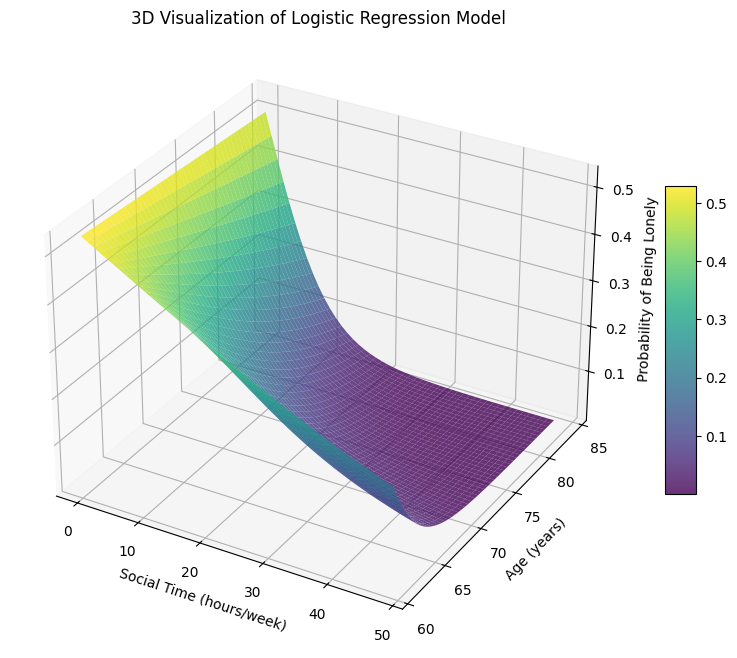

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data_seniors['Social_Time_2022_Data'].min(),
                                compiled_data_seniors['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data_seniors['Age_2022_Data'].min(),
                        compiled_data_seniors['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model4_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [ ]:
compiled_data_seniors['Social_Time_2022_Data'].mean()

3.639784946236559

Teens to Young Adults:

In [ ]:
compiled_data_young = compiled_data[
    (compiled_data['Age_2022_Data'] < 35) &
    (compiled_data['Age_2022_Data'] > 16)
]


In [ ]:
compiled_data_young['Social_Time_2022_Data'].mean()

8.693413173652695

In [ ]:
model5_spec = smf.logit(formula='Lonely_2022_Binary ~ scale(Social_Time_2022_Data) + scale(Age_2022_Data) + scale(Social_Time_2022_Data * Age_2022_Data)', data=compiled_data_young)

In [ ]:
model5_fit = model5_spec.fit()

Optimization terminated successfully.
         Current function value: 0.540248
         Iterations 5


In [ ]:
model5_fit.predict(compiled_data_young)

,0
34,0.756707
45,0.484870
56,0.788472
57,0.757417
132,0.619597
...,...
11353,0.790454
11362,0.795402
11384,0.796692
11385,0.769776


In [ ]:
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Lonely_2022_Binary   No. Observations:                  835
Model:                          Logit   Df Residuals:                      831
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                 0.01619
Time:                        21:12:34   Log-Likelihood:                -451.11
converged:                       True   LL-Null:                       -458.53
Covariance Type:            nonrobust   LLR p-value:                  0.001950
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.1816      0.083     14.314      0.000       1.020       1.343
scale(Social_Time_2022_Data)                     0.0384      0.453      0.085      0.933      -0.850       0.927
scale(Age_2022_Data)                             0.0414      0.111      0.373      0.709      -0.176       0.259
scale(Social_Time_2022_Data * Age_2022_Data)    -0.3335      0.461     -0.724      0.469      -1.236       0.569
================================================================================================================
"""

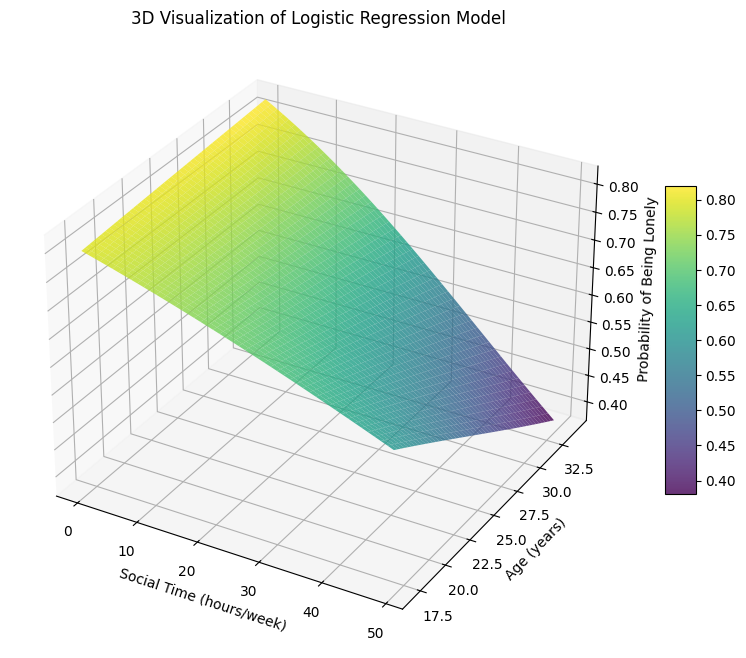

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generate values for both independent variables
social_time_range = np.linspace(compiled_data_young['Social_Time_2022_Data'].min(),
                                compiled_data_young['Social_Time_2022_Data'].max(), 50)
age_range = np.linspace(compiled_data_young['Age_2022_Data'].min(),
                        compiled_data_young['Age_2022_Data'].max(), 50)

# Create a grid of values
social_time_grid, age_grid = np.meshgrid(social_time_range, age_range)
predict_grid = pd.DataFrame({
    'Social_Time_2022_Data': social_time_grid.ravel(),
    'Age_2022_Data': age_grid.ravel()
})

# Predict probabilities for the grid
predict_grid['Predicted_Prob'] = model5_fit.predict(predict_grid)
prob_grid = predict_grid['Predicted_Prob'].values.reshape(social_time_grid.shape)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(social_time_grid, age_grid, prob_grid, cmap=cm.viridis, alpha=0.8)
ax.set_xlabel('Social Time (hours/week)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Probability of Being Lonely')
ax.set_title('3D Visualization of Logistic Regression Model')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

# Question 2

Is there a relationship between the amount of videogames played and the sense of having close individuals one can trust? Alternatively, is the amount of videogames played a good indicator of this sense of closeness to other people?

### Preparing the data

In [ ]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape
dataV2.CONNECTION_activities_onlinegames_p3m.value_counts()

,count
CONNECTION_activities_onlinegames_p3m,
Not in the past three months,1374
A few times a month,461
Weekly,438
Monthly,336
A few times a week,278
Less than monthly,265
Daily or almost daily,226


In [ ]:
print(dataV2.LONELY_dejong_emotional_social_loneliness_scale_close.value_counts())
dataV2.DEMO_age

LONELY_dejong_emotional_social_loneliness_scale_close
Yes             3177
More or less    2713
No              1859
Name: count, dtype: int64


,DEMO_age
0,71.0
1,69.0
2,56.0
3,54.0
4,30.0
...,...
11425,45.0
11426,45.0
11427,36.0
11428,NaN


In [ ]:
data_close_videogames = dataV2[['CONNECTION_activities_onlinegames_p3m',
                               'LONELY_dejong_emotional_social_loneliness_scale_close',
                              'DEMO_age']]

data_close_videogames_clean = data_close_videogames.dropna()
data_close_videogames_clean

,CONNECTION_activities_onlinegames_p3m,LONELY_dejong_emotional_social_loneliness_scale_close,DEMO_age
4,A few times a week,Yes,30.0
8,Not in the past three months,No,66.0
10,Daily or almost daily,Yes,27.0
13,Not in the past three months,Yes,48.0
18,Less than monthly,More or less,50.0
...,...,...,...
11396,Not in the past three months,No,62.0
11398,Daily or almost daily,No,65.0
11407,A few times a month,More or less,40.0
11410,A few times a month,Yes,35.0


In [ ]:
data_close_videogames_clean['close_people_2022'] = data[
    'LONELY_dejong_emotional_social_loneliness_scale_close'].apply(
    lambda x: 'Yes' if x in ['More or less', 'Yes'] else 'No'
)

data_close_videogames_clean = data_close_videogames_clean.rename(columns={'CONNECTION_activities_onlinegames_p3m': 'P3m_videogames_2022',
                                           'DEMO_age': 'Age_2022'})

data_close_videogames_clean.drop(columns = ['LONELY_dejong_emotional_social_loneliness_scale_close'], inplace=True)

data_close_videogames_clean['close_people_2022_binary'] = data_close_videogames_clean[
    'close_people_2022'].apply(lambda x: 1 if x in ['Yes'] else 0)

<ipython-input-64-8c254dd4253a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Some data visualization

In [ ]:
print(data_close_videogames_clean.close_people_2022.value_counts())
print(data_close_videogames_clean.close_people_2022_binary.value_counts())

close_people_2022
Yes    2233
No      440
Name: count, dtype: int64
close_people_2022_binary
1    2233
0     440
Name: count, dtype: int64


In [ ]:
# Filter the data to include only rows where close_people_2022_binary == 1
filtered_data = data_close_videogames_clean[data_close_videogames_clean['close_people_2022_binary'] == 1]

# Create the histogram
fig = px.histogram(filtered_data,
                   x='Age_2022',
                   title="'Yes' Count per Age Range",
                   labels={'Age_2022': 'Age', 'count': "Count of '1's"},
                   nbins=20)  # Adjust nbins to control granularity

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Age',
                  yaxis_title="'Yes' Count")

# Show the plot
fig.show()

In [ ]:
# Filter the data to include only rows where close_people_2022_binary == 1
filtered_data = data_close_videogames_clean[data_close_videogames_clean['close_people_2022_binary'] == 1]

# Create the histogram
fig = px.histogram(filtered_data,
                   x='P3m_videogames_2022',
                   title="'Yes' Count per Video Game Usage",
                   labels={'P3m_videogames_2022': 'Videogame Categories', 'count': "Count of '1's"},
                   category_orders={'P3m_videogames_2022': sorted(filtered_data['P3m_videogames_2022'].unique())})  # Optional: sort categories

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Videogame Usage Categories (Last 3 Months)',
                  yaxis_title="'Yes' Count")

# Show the plot
fig.show()

In [ ]:
# Group the data by videogame category and age range
# Create age bins for better visualization
data_close_videogames_clean['Age_Range'] = pd.cut(
    data_close_videogames_clean['Age_2022'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
)

# Count occurrences within each category and age range
grouped_data = data_close_videogames_clean.groupby(['P3m_videogames_2022', 'Age_Range']).size().reset_index(name='Count')

# Create the grouped bar chart
fig = px.bar(grouped_data,
             x='P3m_videogames_2022',
             y='Count',
             color='Age_Range',
             barmode='group',
             title='Distribution of Age Ranges by Videogame Usage Categories',
             labels={'P3m_videogames_2022': 'Videogame Usage Categories (Last 3 Months)',
                     'Count': 'Number of People',
                     'Age_Range': 'Age Range'})

# Customize the layout
fig.update_layout(template='plotly_white',
                  xaxis_title='Videogame Usage Categories',
                  yaxis_title='Count of People',
                  legend_title='Age Range')

# Show the plot
fig.show()


<ipython-input-68-c04ad3298b70>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Model building, utilizing train-test and scikit learn

##### Model 1

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validated accuracy: 0.8400358948543414
Confusion Matrix:
 [[  0 101]
 [  0 434]]
Accuracy: 0.811


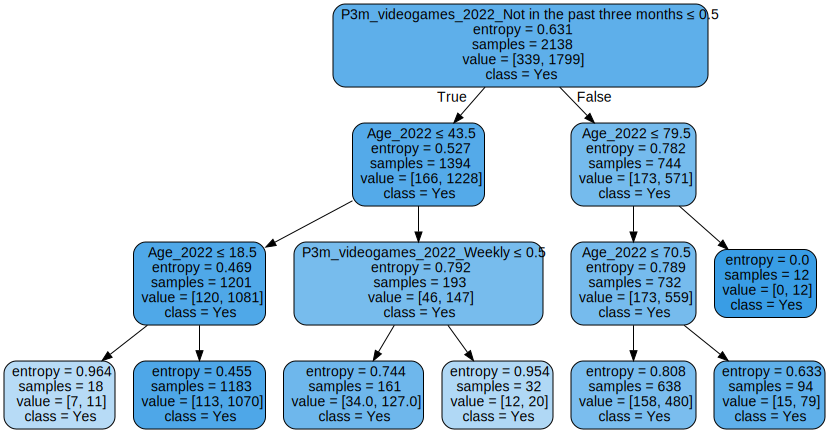

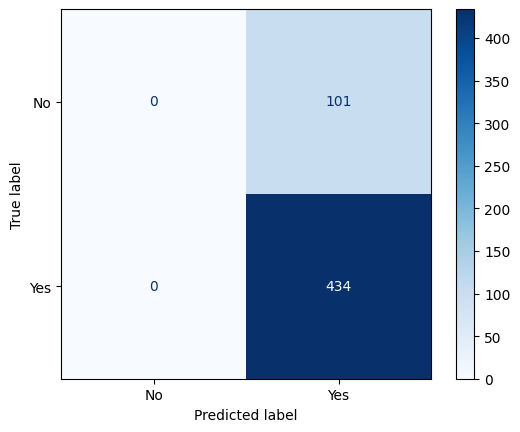

In [ ]:
# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 with weighted classes

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.615526713213246
Confusion Matrix:
 [[ 52  49]
 [162 272]]
Accuracy: 0.606


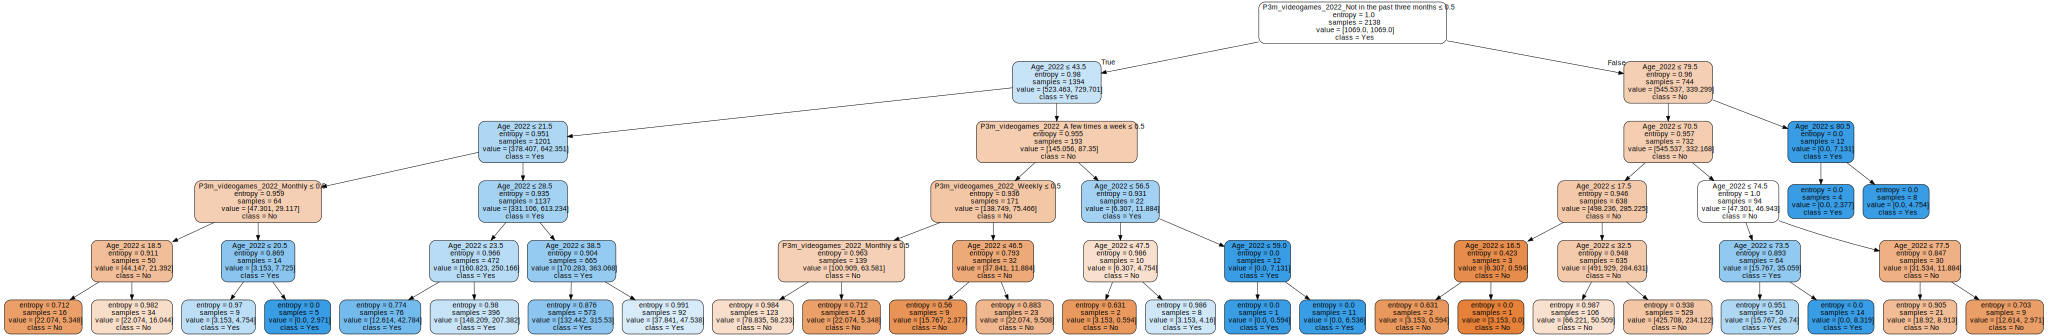

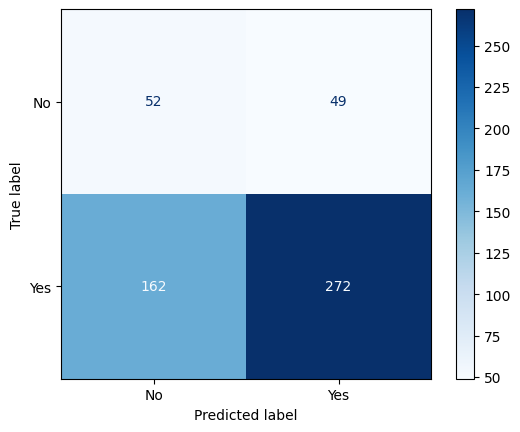

In [ ]:
# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 Age Range 0 to 35

(1418, 5)
(2673, 5)
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validated accuracy: 0.826278659611993
Confusion Matrix:
 [[  8  31]
 [ 30 215]]
Accuracy: 0.785


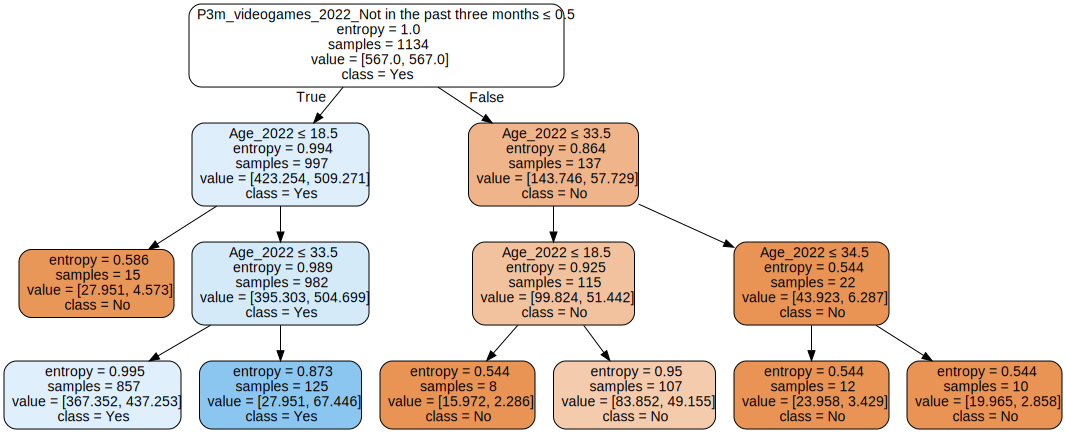

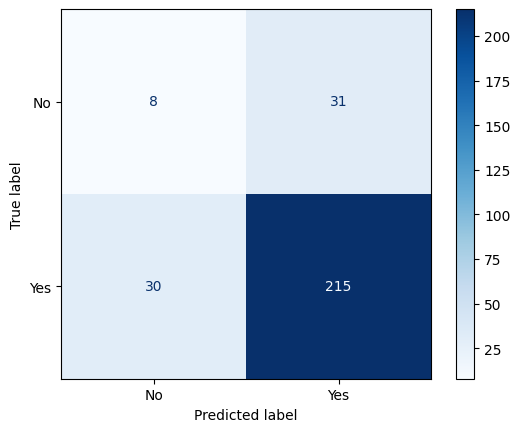

In [ ]:
data_close_videogames_clean_filtered = data_close_videogames_clean[data_close_videogames_clean['Age_2022'] <= 35]
print(data_close_videogames_clean_filtered.shape)
print(data_close_videogames_clean.shape)

# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean_filtered, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

##### Model 2 Age Range 35 and above

(1418, 5)
(2673, 5)
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.5367533589537343
Confusion Matrix:
 [[ 31  16]
 [133  71]]
Accuracy: 0.406


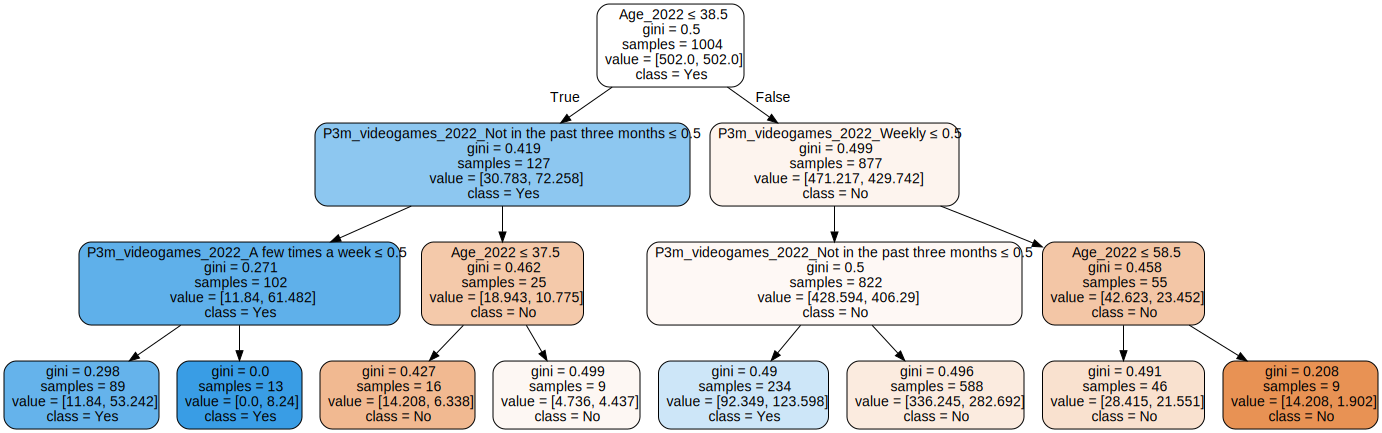

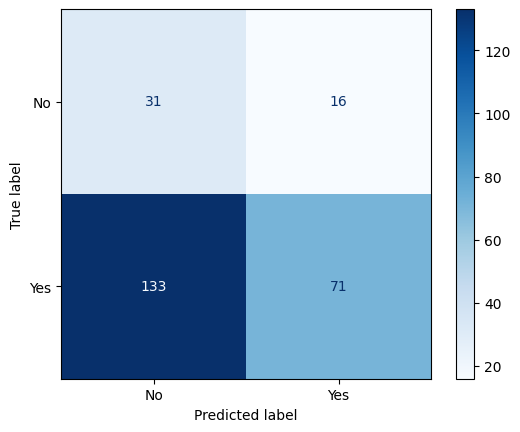

In [ ]:
data_close_videogames_clean_filtered_v2 = data_close_videogames_clean[data_close_videogames_clean['Age_2022'] > 35]
print(data_close_videogames_clean_filtered.shape)
print(data_close_videogames_clean.shape)

# Step 1: Encode the categorical variable
data_clean = pd.get_dummies(data_close_videogames_clean_filtered_v2, columns=['P3m_videogames_2022'], drop_first=True)

# Step 2: Define target and predictors
X = data_clean[['Age_2022'] + [col for col in data_clean.columns if 'P3m_videogames_2022_' in col]]
y = pd.get_dummies(data_clean['close_people_2022'])['Yes']  # Binary encoding: Yes -> 1, No -> 0

# Step 3: Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree and GridSearchCV
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the search
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Fit the best model
best_clf = grid_search.best_estimator_

# Step 5: Predict and evaluate
y_pred = best_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='.3g')
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Optional: Export the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_clf, out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

# Question 3

How did covid affect people's loneliness for different age groups


In [ ]:
new_df = dataV2[['DEMO_age', 'LONELY_change_pre_covid']]
new_df

,DEMO_age,LONELY_change_pre_covid
0,71.0,NaN
1,69.0,NaN
2,56.0,NaN
3,54.0,NaN
4,30.0,Somewhat more lonely
...,...,...
11425,45.0,NaN
11426,45.0,NaN
11427,36.0,NaN
11428,NaN,Somewhat more lonely


In [ ]:
new_df = new_df.dropna()
new_df

,DEMO_age,LONELY_change_pre_covid
4,30.0,Somewhat more lonely
8,66.0,Somewhat less lonely
10,27.0,About the same
13,48.0,About the same
18,50.0,About the same
...,...,...
11396,62.0,Somewhat more lonely
11398,65.0,Much more lonely
11407,40.0,About the same
11410,35.0,Somewhat more lonely


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Encoding the "LONELY_change_pre_covid" variable
encoding_map = {
    "Much less lonely": -2,
    "Somewhat less lonely": -1,
    "About the same": 0,
    "Somewhat more lonely": 1,
    "Much more lonely": 2
}

# Apply the encoding
data['LONELY_encoded'] = data['LONELY_change_pre_covid'].map(encoding_map)

# Clean data by removing any rows with missing values
clean_data = data[['DEMO_age', 'LONELY_encoded']].dropna()

# Extract independent (X) and dependent (y) variables for regression
X = clean_data[['DEMO_age']]
y = clean_data['LONELY_encoded']

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Predict values and calculate R^2 score
y_pred = regressor.predict(X)
r2 = r2_score(y, y_pred)

# Regression results
regression_results = {
    "slope": regressor.coef_[0],
    "intercept": regressor.intercept_,
    "r_squared": r2
}

print(regression_results)


{'slope': 0.004022184501639306, 'intercept': 0.5088845735845386, 'r_squared': 0.004018038209144148}


<ipython-input-72-f3e62488136e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




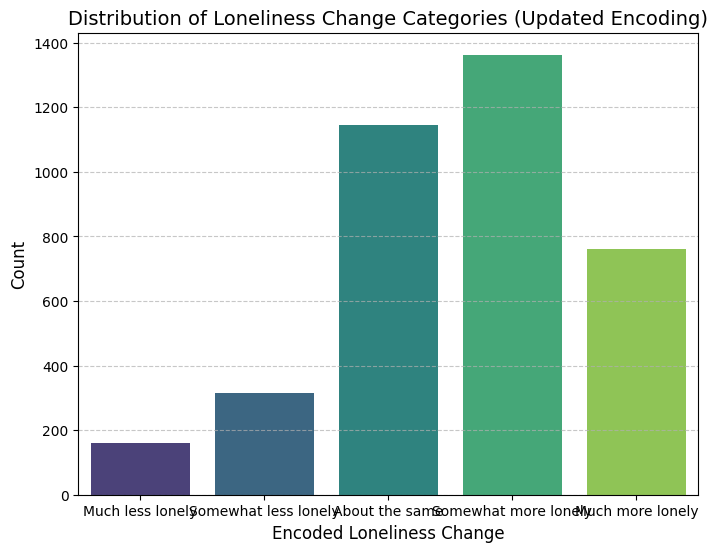

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['LONELY_encoded'], palette='viridis')
plt.title('Distribution of Loneliness Change Categories (Updated Encoding)', fontsize=14)
plt.xlabel('Encoded Loneliness Change', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Much less lonely', 'Somewhat less lonely', 'About the same',
                                              'Somewhat more lonely', 'Much more lonely'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

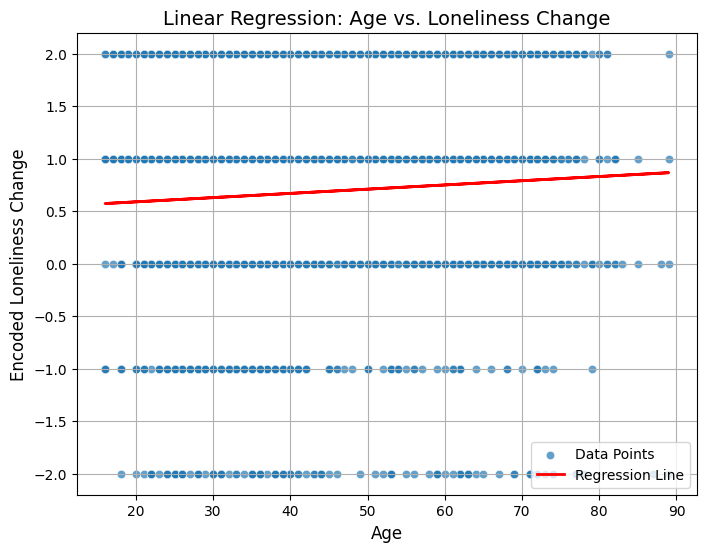

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with linear regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clean_data['DEMO_age'], y=clean_data['LONELY_encoded'], label='Data Points', alpha=0.7)
plt.plot(clean_data['DEMO_age'], y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Age vs. Loneliness Change', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Encoded Loneliness Change', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()